In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

In [2]:
#Importing our File to a variable df

df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


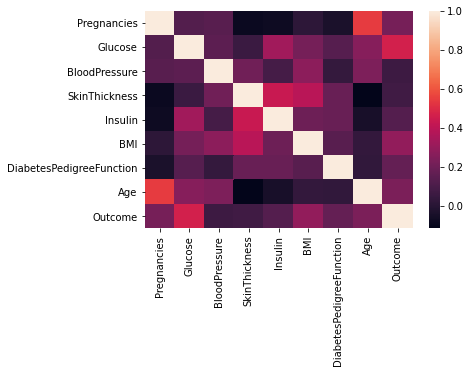

In [5]:
sns.heatmap(df.corr()) 
plt.show()

In [6]:
no_count, dia_count = df['Outcome'].value_counts()
print('1 - Diabetes count: ', dia_count)
print('0 - No diabetes count: ', no_count)

1 - Diabetes count:  268
0 - No diabetes count:  500


In [7]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [8]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
x_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.021220,-0.310189,0.382704,-0.044392,0.180635,-0.496294,-1.062533,-0.547938
1,-0.855331,-0.279113,-0.350706,-0.482365,0.877812,-1.066286,-1.003347,-0.877806
2,-1.147515,0.622115,-0.193547,0.331015,0.435700,1.343224,-0.136266,-0.795339
3,1.482139,1.989495,0.854181,-0.357230,-0.669580,-0.289024,2.177921,1.266338
4,0.021220,0.963960,1.116113,1.081827,-0.669580,-0.327887,-0.541693,0.194266
...,...,...,...,...,...,...,...,...
532,1.774322,1.305805,0.801795,-1.295746,-0.669580,-0.586975,-0.873137,1.678674
533,-1.147515,-0.838495,-0.455479,0.268447,0.112618,-0.457431,0.162625,-0.960273
534,-0.563147,0.062732,-0.455479,-0.169527,0.231648,-0.314933,0.710099,-0.960273
535,0.897771,-1.149264,0.487476,0.331015,-0.065927,-0.379705,0.858065,0.194266


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


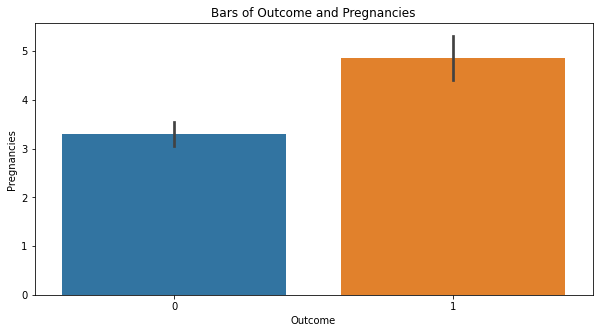

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot('Outcome', 'Pregnancies', data=df, ) 

plt.title("Bars of Outcome and Pregnancies")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")
plt.show()

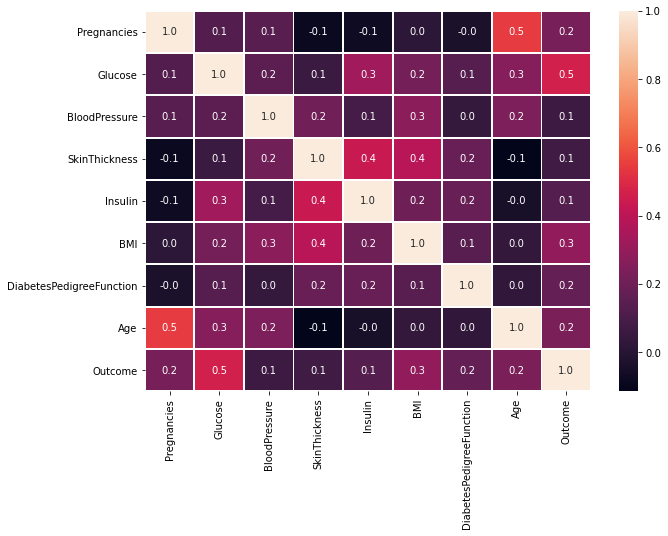

In [10]:
plt.figure(figsize=(10, 7))

sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.1f')
plt.show()

In [11]:
feature_columns = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                      'BMI', 'DiabetesPedigreeFunction', 'Age']]

feature_columns.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [12]:
outcome_column = df['Outcome']
outcome_column.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

[0.08404325 0.26434313 0.08974809 0.0679867  0.07706984 0.16331699
 0.12193916 0.13155285]


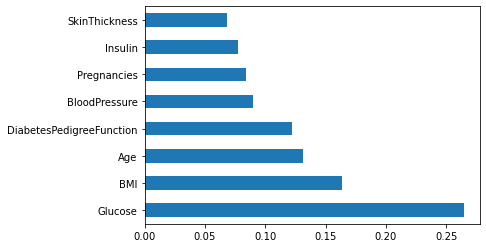

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split( feature_columns, outcome_column, test_size=0.2, random_state=5) 


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614,)
(154,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix



model = LogisticRegression()

model = model.fit(x_train, y_train)

score = model.predict(x_train)

In [16]:
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score:  ", model.score(x_test, y_test))

Training Score:  0.7785016286644951
Testing Score:   0.7987012987012987


In [17]:
prediction = model.predict(x_test)
print("Model Accuracy is : ", prediction)

Model Accuracy is :  [0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1]


In [18]:
accuracy_score(y_test, prediction)

0.7987012987012987

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
a = int(input("Mention Your Fasting Glucose Level: "))


if a >= 140:
    if a <= 170:
        print("You have a high chance of Suffering from Diabetes!!")
else:
    print("Hurray You are Safe!!")
if a >= 171:
    if a <=200:
        print("You are Surely a Diabetic...Avoid Eating any Sweets.")
if a >=201 :
    print("Go Visit Some Good Endocrinologists, Dude...!!!")

Mention Your Fasting Glucose Level: 150
You have a high chance of Suffering from Diabetes!!


In [21]:
weight = int(input("Mention Your Weight in Kg: "))
height = int(input("Mention Your Height in Centimeter: "))
waist = int(input("Mention Your Waist Size in Inches: "))

b = weight / (height/100)**2
print("\nYour Body Mass Index (BMI) is:", b)


if b <= 18.5:
    print("\nYou are Underweight...Start Eating Some Healthy Diet. ")

if b >= 18.51:
    if b <=24.9:
        print("\nYou are Healthy...Maintain This!! ")
        
if b >= 24.91:
    if b <=29.9:
        print("\nYou are Overweight...Start Some Physical Activity. ")
        
if b >= 29.91:
    if b <=39.9:
        print("\nYou are Obese...Make some Lifestyle changes...!!! ")
    else:
        print("\nTera Kuchh Nahi Ho Sakta..!!")

Mention Your Weight in Kg: 70
Mention Your Height in Centimeter: 163
Mention Your Waist Size in Inches: 50

Your Body Mass Index (BMI) is: 26.346494034400994

You are Overweight...Start Some Physical Activity. 


In [22]:
if b >= 24.91:
    print("Your BMI is High and So is your chance of Suffering from Diabetes..!!")
else:
    print("Hurray, Your BMI is Great and you are Safe from Diabetes!!")

Your BMI is High and So is your chance of Suffering from Diabetes..!!


In [23]:
c = int(input("Enter Your Diastolic (Lower Value) Blood Pressure Value: "))


if c >= 80:
    print("You have a high chance of Suffering from Diabetes and Heart Ailments!!")
else:
    print("Hurray You are Safe!!")

Enter Your Diastolic (Lower Value) Blood Pressure Value: 70
Hurray You are Safe!!
